<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1ZAicRye9Ixj7jijCwNhU8Fhf6Rmjp2Z7" width = "200" align="center"/>

El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [3]:
#Creamos el conjunto de dato con variables numéricas
df.dtypes #Primero vemos qué valores son numéricos

year                      int64
desplazamiento          float64
cilindros               float64
co2                     float64
clase_tipo               object
traccion_tipo            object
transmision_tipo         object
combustible_tipo         object
tamano_motor_tipo        object
consumo_tipo             object
co2_tipo                 object
consumo_litros_milla    float64
dtype: object

In [4]:
#1. Creamos un dfnum que tiene los valores numericos quitando los valores que no son numericos
dfnum=df.drop(["clase_tipo","traccion_tipo","transmision_tipo","combustible_tipo","tamano_motor_tipo","consumo_tipo","co2_tipo"],axis=1)
dfnum.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [5]:
#Contamos cuántos valores null hay en todo nuestro dfnum

yearnull=dfnum['year'].isna().sum()
print("yearnull:",yearnull)
desplazamientonull=dfnum['desplazamiento'].isna().sum()
print("desplazamientonull:",desplazamientonull)
cilindrosnull=dfnum['cilindros'].isna().sum()
print("cilindrosnull:", cilindrosnull)
co2null=dfnum['co2'].isna().sum()
print("co2null:",co2null)
consumolitronull=dfnum['consumo_litros_milla'].isna().sum()
print("consumonull:",consumolitronull)

#Concluimos que debemos arreglar los datos de desplazamiento y de cilindro solamente

yearnull: 0
desplazamientonull: 2
cilindrosnull: 3
co2null: 0
consumonull: 0


In [6]:
#Calculamos el promedio de el desplazamiento y el cilindro

prom_des=dfnum['desplazamiento'].mean(skipna = True)
prom_cil=dfnum['cilindros'].mean(skipna = True)

#Rellenamosl os valoes nulos con el promedio calculado

dfnum.fillna({'desplazamiento': prom_des}, inplace=True)
dfnum.fillna({'cilindros': prom_cil}, inplace=True)

#Finalmente, escalamos con la funcion dada

scaler=MinMaxScaler()
colnum = ["desplazamiento", "cilindros", "co2", "consumo_litros_milla"]
dfnum[colnum] = scaler.fit_transform(dfnum[colnum])

dfnum.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,0.243590,0.142857,0.398014,0.331027
1,1984,0.461538,0.285714,0.527672,0.475113
2,1985,0.243590,0.142857,0.424351,0.360294
3,1985,0.461538,0.285714,0.527672,0.475113
4,1987,0.410256,0.285714,0.424351,0.360294


In [7]:
#2. Ahora crearemos un df con las variables categoricas
dfcat=df.drop(["year","desplazamiento","cilindros","co2","consumo_litros_milla"],axis=1)
dfcat.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [8]:
#Se usa get_dummies. Esta función crea un df con todas las clases de tipos (por ejepmplo, la columna tracción la transforma en
# tracción_tipo_dos y tracción_tipo_4, y si por ejemplo en la fila 1 es de traccion tipo dos, entonces pone un 0 en la columna de
#traccion_tipo_cuatro y un 1 en la columna de traccion_tipo_dos).
dfcatdum=pd.get_dummies(dfcat)
dfcatdum.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [9]:
#3. Juntemos ambos df
df_procesado=pd.concat([dfnum,dfcatdum],axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,1984,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1984,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1985,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1985,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1987,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [30]:
# 1. Ajuste del modelo K-means
k = 8 # Número de clusters
n_init = 10 # Número de inicializaciones
kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
kmeans.fit(df_procesado)

KMeans(n_init=10, random_state=42)

In [31]:
# 2.
# Asociar a cada individuo el correspondiente cluster
clusters = kmeans.predict(df_procesado)

# Calcular el valor de los centroides de cada cluster
centroids = kmeans.cluster_centers_

In [32]:
# 3.
# Crear un Dataframe para resumir las cualidades de cada cluster
cluster_summary = pd.DataFrame()

# Valor promedio de las variables numéricas en cada cluster
cluster_summary['Promedio'] = df_procesado.groupby(clusters).mean().mean(axis=1)

# Moda para las variables numéricas en cada cluster
for column in df_procesado.columns:
    if df_procesado[column].dtype != 'object':
        cluster_summary[f'Moda de {column}'] = df_procesado.groupby(clusters)[column].apply(lambda x: x.mode().iloc[0])

<ipython-input-32-3b1d260714de>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary['Promedio'] = df_procesado.groupby(clusters).mean().mean(axis=1)


In [33]:
# Imprimir el resumen de cada cluster
print("Resumen de las principales cualidades de cada cluster:")
cluster_summary

Resumen de las principales cualidades de cada cluster:


,Promedio,Moda de year,Moda de desplazamiento,Moda de cilindros,Moda de co2,Moda de consumo_litros_milla,Moda de clase_tipo_Camionetas,Moda de clase_tipo_Coche Familiar,Moda de clase_tipo_Coches Grandes,Moda de clase_tipo_Coches Medianos,...,Moda de consumo_tipo_bajo,Moda de consumo_tipo_moderado,Moda de consumo_tipo_muy alto,Moda de consumo_tipo_muy bajo,Moda de co2_tipo_alto,Moda de co2_tipo_bajo,Moda de co2_tipo_moderado,Moda de co2_tipo_muy alto,Moda de co2_tipo_muy bajo,Moda de cluster
0,55.603185,1992,0.307692,0.285714,0.374603,0.305011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,56.106892,2013,0.179487,0.285714,0.317749,0.241830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,55.493454,1989,0.243590,0.142857,0.374603,0.305011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,55.836358,2004,0.179487,0.285714,0.317749,0.241830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,55.982244,2008,0.307692,0.285714,0.353657,0.281734,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,55.733041,2001,0.179487,0.285714,0.374603,0.305011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,55.379411,1985,0.179487,0.142857,0.353657,0.281734,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7,56.216695,2015,0.179487,0.142857,0.256333,0.241830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [20]:
# Secuencia de números de clusters a comparar
num_clusters = [5,10,20,30,50,75,100,200,300]

# Lista para almacenar las inercias
inertias = []

# Ajuste del modelo K-means y cálculo de la inercia para cada número de clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(df_procesado)
    inertias.append(kmeans.inertia_)

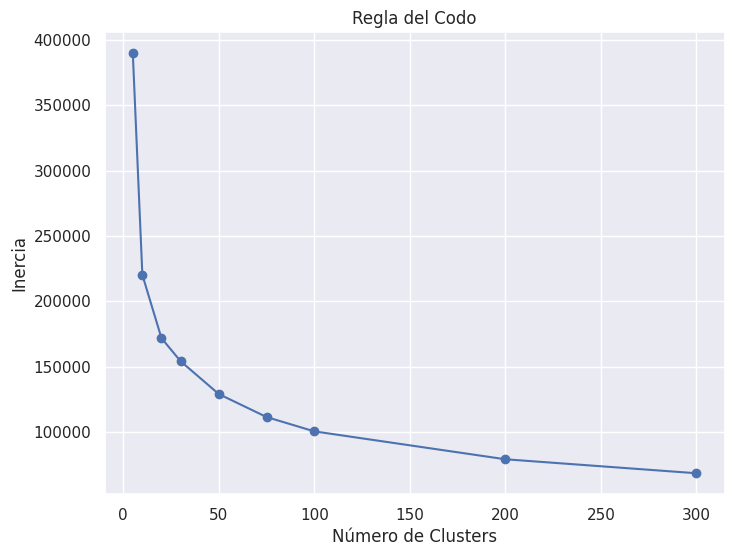

In [22]:
# Gráfico de la regla del codo
fig, axs = plt.subplots(figsize=(8,6))
plt.plot(num_clusters, inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Regla del Codo')
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [23]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [24]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [26]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris[features])

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1','PC2'])
pca_df['species'] = iris[target]

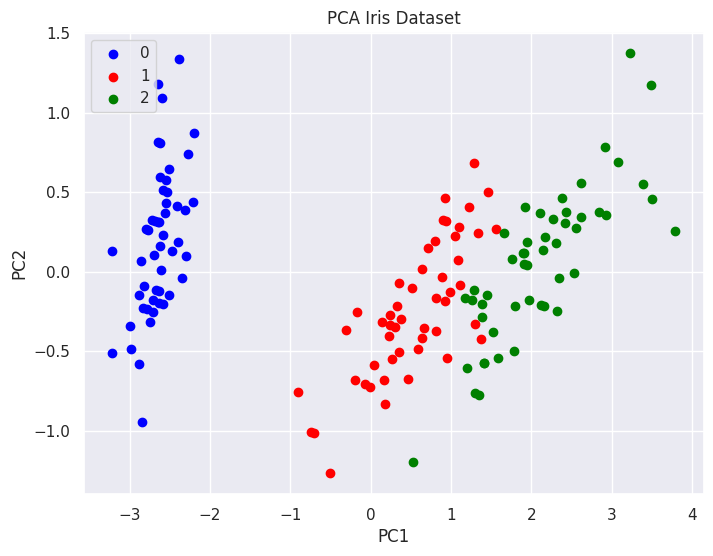

In [27]:
# Gráfico de los resultados de PCA
plt.figure(figsize=(8, 6))
targets = [0,1,2]
colors = ['blue', 'red', 'green']
for target, color in zip (targets, colors):
    indices = pca_df['species'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c=color, label=target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Iris Dataset')
plt.legend()
plt.show()

In [28]:
# t-SNE
target = 'species'
tsne = TSNE (n_components=2, random_state=42)
tsne_result = tsne.fit_transform(iris[features])
# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(data=tsne_result, columns=['Diml', 'Dim2'])
tsne_df['species'] = iris[target].copy()

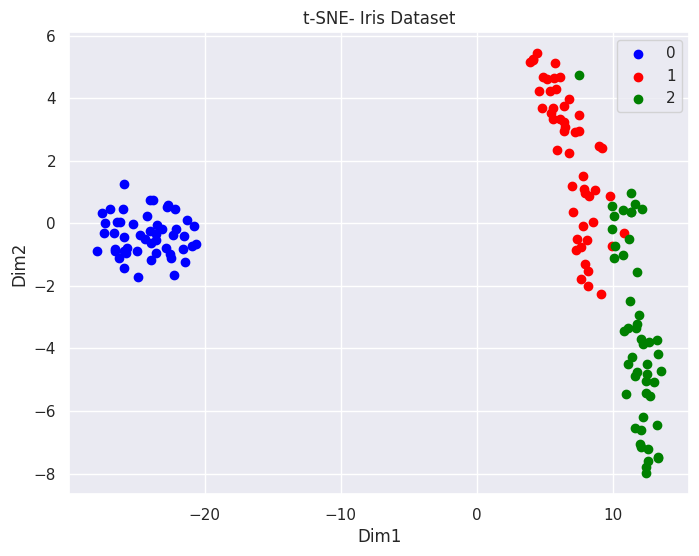

In [29]:
# Gráfico de los resultados de t-SNE
plt.figure(figsize=(8, 6))
for target, color in zip(targets, colors):
    indices = tsne_df['species'] == target
    plt.scatter(tsne_df.loc[indices, 'Diml'], tsne_df.loc[indices, 'Dim2'], c=color, label=target)
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('t-SNE- Iris Dataset')
plt.legend()
plt.show()

Conclusiones del caso: Es observable la separación de categorías en ambos casos, pero el TSNE los separa mejor a diferencia de PCA.
